In [93]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, plot_confusion_matrix, plot_roc_curve, 
                             classification_report, precision_recall_curve, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import numpy as np
import seaborn as sns

In [22]:
folder = "data/comp1_2020_1/"
Path(folder).mkdir(parents=True, exist_ok=True)

In [23]:
with open(f'{folder}/dropout_df_total_and_per_week_dict_3_6.pkl', 'rb') as pklfile:
    df_total_and_per_week = pickle.load(pklfile)

In [24]:
exclude = df_total_and_per_week[(df_total_and_per_week['attempts_12'] == 0) & \
                                (df_total_and_per_week['attempts_13'] == 0) & \
                                (df_total_and_per_week['attempts_14'] == 0) & \
                                (df_total_and_per_week['attempts_15'] == 0)]
dtw2 = df_total_and_per_week.drop(index=exclude.index)
dtw2

,attempts_12,success_rate_12,avg_timedelta_to_solution_12,avg_timedelta_from_beginning_12,on_time_exercises_12,frequency_12,success_count_12,attempts_13,success_rate_13,avg_timedelta_to_solution_13,...,on_time_exercises_19,frequency_19,success_count_19,attempts,success_rate,avg_timedelta_to_solution,avg_timedelta_from_beginning,on_time_exercises,frequency,success_count
910,8,0.375000,65.386857,328.720191,3,1,3,24,0.291667,291.476823,...,6,1,6,32,0.312500,223.649833,519.849833,10,2,10
911,4,0.750000,132.823499,684.156833,3,1,3,36,0.194444,23916.274449,...,6,2,6,40,0.250000,16781.239164,17381.439164,10,3,10
912,6,0.500000,24.270101,207.270101,3,1,3,7,1.000000,0.000000,...,6,1,6,13,0.769231,7.281030,141.581030,10,2,10
914,9,0.333333,430.621847,918.621847,3,1,3,91,0.076923,40044.526822,...,6,2,6,100,0.100000,28160.355329,28983.855329,10,4,10
915,8,0.375000,124.739469,243.072802,3,1,3,12,0.416667,18.759911,...,5,1,5,20,0.400000,58.502245,167.252245,8,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,0,NaN,NaN,NaN,0,3,0,0,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,0,3,0
1403,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,...,5,1,5,0,NaN,NaN,NaN,0,0,0
1405,6,0.500000,32.428669,655.095336,0,2,3,22,0.181818,26859.988079,...,0,0,0,28,0.250000,15362.462618,15919.319761,0,7,7
1407,56,0.053571,2124.487458,3170.154125,0,1,3,0,NaN,NaN,...,0,0,0,56,0.053571,NaN,NaN,0,3,3


In [25]:
dtw2['success_count_label'] = dtw2['success_count_17'] + dtw2['success_count_19']

In [26]:
# Features and fill missing data
features_week6 = dtw2[['on_time_exercises_12',
                       'on_time_exercises_13',
                       'on_time_exercises_14',
                      ]].reset_index(drop=True)


In [27]:
features_week6.head()

,on_time_exercises_12,on_time_exercises_13,on_time_exercises_14
0,3,7,7
1,3,7,7
2,3,7,7
3,3,7,7
4,3,5,6


In [29]:
dtw2['dropped'] = np.where(dtw2['success_count_label'] >= 6, 0, 1)
dtw2['dropped']

# Target
outcome_week6 = dtw2['dropped'].reset_index(drop=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features_week6, outcome_week6, test_size=0.2, random_state=0)
idx = np.array(X_train.index.tolist())

In [47]:
clf_LR = LogisticRegression(random_state=0).fit(X_train, y_train)

In [59]:
y_pred_LR = clf_LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.60      0.50      0.55        18

    accuracy                           0.82        82
   macro avg       0.73      0.70      0.72        82
weighted avg       0.81      0.82      0.81        82



c:\Users\joaop\machine-teaching\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


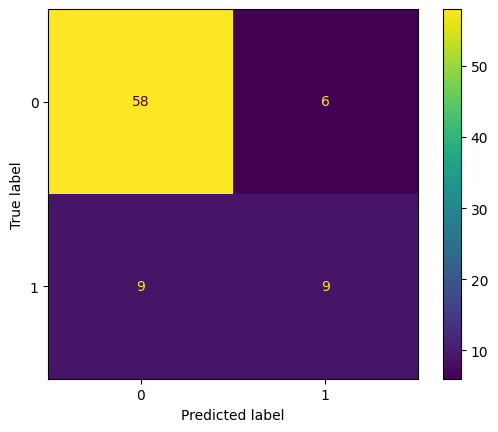

In [60]:
print(classification_report(y_test, y_pred_LR))
plot_confusion_matrix(clf_LR, X_test, y_test) 

c:\Users\joaop\machine-teaching\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


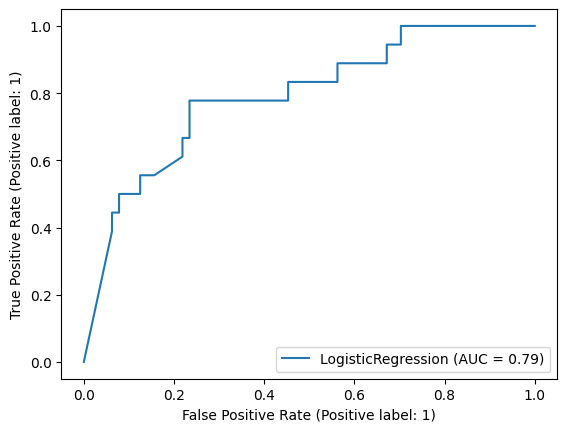

In [52]:
plot_roc_curve(clf_LR, X_test, y_test)

In [86]:
y_test_predicted_probas = clf_LR.predict_proba(X_test)[:,1]

In [87]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predicted_probas)
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds[np.argmax(f1_scores)]

In [88]:
max_f1

0.5957446808510638

In [89]:
max_f1_thresh

0.3283894583842727

In [104]:
y_test_pred_LR_p0 = 1*(y_test_predicted_probas >= max_f1_thresh)

print(classification_report(y_test, y_test_pred_LR_p0))


              precision    recall  f1-score   support

           0       0.92      0.77      0.84        64
           1       0.48      0.78      0.60        18

    accuracy                           0.77        82
   macro avg       0.70      0.77      0.72        82
weighted avg       0.83      0.77      0.78        82



In [27]:
with open("%s/*.pkl" % folder, "wb") as pklfile:
    pickle.dump(model, pklfile)